# NetFilx Project Data Analysis
<img src="dateset/Transparent netflix logo.png" alt='netfilx logo' style="margin-top:15px:margin-bottom:15px"/>

In [1]:
# reading Data 
# import libaray
import pandas as pd 

# read data
nf = pd.read_csv('dateset/Netflix Dataset.csv')

# looking a heading Data
nf.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [2]:
# look a ashape of data
nf.shape

(7789, 11)

In [3]:
# size attribute => return number of element (number of ceils) = (number of row * number of columsn)
nf.size

85679

In [4]:
# return columns name 
nf.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [5]:
# return data type for each columns
nf.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [6]:
# return information about all coulmns by info function
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [7]:
# Task 1 : Known Duplicate and remove ti if Found.

In [8]:
nf[nf.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [9]:
# you have tow records dupliactes
# remove dupliacte by use drop_dupliacted()
print("Shape before remove dupliacte = {}".format(nf.shape))
nf = nf.drop_duplicates()
print("Shape After remove dupliacte = {}".format(nf.shape))

Shape before remove dupliacte = (7789, 11)
Shape After remove dupliacte = (7787, 11)


In [10]:
nf[nf.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


In [11]:
# Task 2 : Null Value 

In [12]:
nf.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<AxesSubplot:>

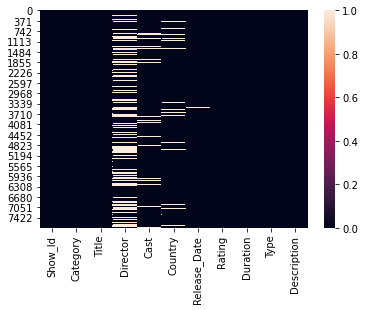

In [13]:
from seaborn import heatmap 
heatmap(nf.isnull())

In [14]:
# Q1 : House of Cards: What is the show id and What of Director of this show?

In [15]:
nf[nf['Title'] == "House of Cards"]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [16]:
%%time
nf[nf['Title'] == 'House of Cards']['Show_Id']

Wall time: 1.99 ms


2832    s2833
Name: Show_Id, dtype: object

In [17]:
%%time
nf[nf['Title'].isin(['House of Cards'])]['Show_Id']

Wall time: 2.5 ms


2832    s2833
Name: Show_Id, dtype: object

In [18]:
%%time
nf[nf['Title'].str.contains('House of Cards')]['Show_Id']

Wall time: 9.17 ms


2832    s2833
Name: Show_Id, dtype: object

In [19]:
nf[nf['Title'].isin(['House of Cards'])]['Director']

2832    Robin Wright, David Fincher, Gerald McRaney, J...
Name: Director, dtype: object

In [20]:
nf[nf['Title'].str.contains('House of Cards')]['Director']

2832    Robin Wright, David Fincher, Gerald McRaney, J...
Name: Director, dtype: object

In [21]:
nf[nf['Title'] == 'House of Cards']['Director']

2832    Robin Wright, David Fincher, Gerald McRaney, J...
Name: Director, dtype: object

In [22]:
# split Director and return as list 
director = nf[nf['Title'] == 'House of Cards']['Director'].str.split(',').tolist()
director

[['Robin Wright',
  ' David Fincher',
  ' Gerald McRaney',
  ' John David Coles',
  ' David Manson']]

In [23]:
# in which Your Heighest number of TV Shows and Movies releasse?

In [24]:
nf.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [25]:
# CHange Columns Release_Date to Datetime and Create nre columns Release_Year
nf['Release_Date'] = pd.to_datetime(nf['Release_Date'])

# checkign type of Release columns
type(nf['Release_Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [26]:
# create new columns 
nf['Release_Year'] = nf['Release_Date'].dt.year

# lookgin a head of Release_Year
nf['Release_Year'].head()

0    2020.0
1    2016.0
2    2018.0
3    2017.0
4    2020.0
Name: Release_Year, dtype: float64

<AxesSubplot:>

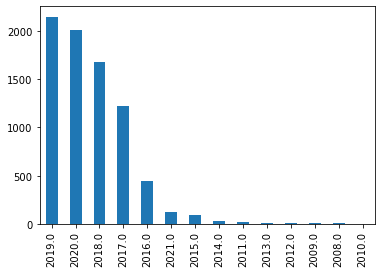

In [27]:
nf['Release_Year'].value_counts().plot(kind='bar')

In [28]:
# How Many Movies and TV Show are in The dateset? with Baar Graphic

<AxesSubplot:xlabel='Category'>

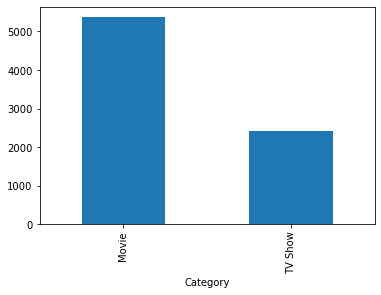

In [29]:
nf.groupby('Category')['Category'].count().plot(kind='bar')

<AxesSubplot:xlabel='Category', ylabel='count'>

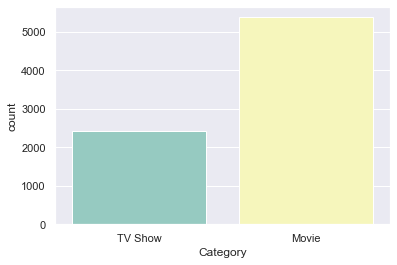

In [30]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.countplot(x ='Category',data=nf,palette="Set3")

In [31]:
# Show all The moive release in Year 2000 and 2020

print("No. Movie 2000 = {}".format(nf[(nf['Category'] == 'Movie') & (nf['Release_Date'].dt.year == 2000)]['Category'].count()))
print("No. Movie 2020 = {}".format(nf[(nf['Category'] == 'Movie') & (nf['Release_Date'].dt.year == 2020)]['Category'].count()))

No. Movie 2000 = 0
No. Movie 2020 = 1312


In [32]:
# Show TO 10 Direcotory Who Give Heighest number of TV Show and Moive to Netfilx?
nf['Director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Robert Rodriguez           8
Name: Director, dtype: int64

In [33]:
nf.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7779, 7780, 7781, 7782, 7783, 7784, 7785, 7786, 7787, 7788],
           dtype='int64', length=7787)

In [42]:
# show all records where 'Catgrory' is Moive and Type is Comdey or Country is Uinted kingdom

nf[(nf['Category'] == "Movie") & ((nf['Type'] == 'Comedies') | (nf['Country'] == 'United Kingdom'))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021.0
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,2018-12-20,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018.0
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,2019-04-16,R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7634,s7633,Movie,Wine Country,Amy Poehler,"Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...",United States,2019-05-10,R,104 min,Comedies,When longtime friends meet up for a wine-soake...,2019.0
7649,s7648,Movie,Without Gorky,Cosima Spender,NaN,United Kingdom,2017-05-31,TV-14,80 min,Documentaries,A filmmaker trains the camera on her own famil...,2017.0
7664,s7663,Movie,Work It,Laura Terruso,"Sabrina Carpenter, Jordan Fisher, Liza Koshy, ...",United States,2020-08-07,TV-14,94 min,Comedies,A brilliant but clumsy high school senior vows...,2020.0
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,2020-03-18,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020.0


In [37]:
nf['Type'].head(10)

0    International TV Shows, TV Dramas, TV Sci-Fi &...
1                         Dramas, International Movies
2                  Horror Movies, International Movies
3    Action & Adventure, Independent Movies, Sci-Fi...
4                                               Dramas
5      International TV Shows, TV Dramas, TV Mysteries
6                  Horror Movies, International Movies
7                                               Dramas
8                  Horror Movies, International Movies
9       Horror Movies, International Movies, Thrillers
Name: Type, dtype: object

In [41]:
nf['Country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       nan, 'Norway, Iceland, United States', 'United Kingdom', 'Japan',
       'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania', 'Spain',
       'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada, Unit

In [45]:
# in how many moovie/show, tom Cruise was cust?
nf[nf['Cast'] == 'Tom Curise']

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year


In [46]:
df_new = nf.dropna()
df_new.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017.0


In [73]:
df_new[df_new['Cast'].apply(lambda x : x == 'Tom')]['Cast'].unique()

array([], dtype=object)

In [78]:
df_new[df_new['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019.0


In [79]:
# What are the difrrent Rating definted by netflix?
nf['Rating'].nunique()

14

In [80]:
nf['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [81]:
# how many movie got the Rating equal 'TV-14' in Canda?
len(nf[(nf['Rating'] == 'TV-14') & (nf['Category'] == 'TV Show') & (nf['Country'] == 'Canada')])

12

In [82]:
# how many TV Show got R Rating and All item in year >  2018
nf.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0


In [87]:
len(nf[(nf['Category'] == 'TV Show') & (nf['Rating'] == 'R') & (nf['Release_Year'] > 2018.0)])

1

In [88]:
nf['Release_Year'].dtypes

dtype('float64')

In [89]:
# Which is the maximum of a Movie/ Show on netflix?
nf['Duration'].nunique()

216

In [92]:
nf[['Duration_no','Uints']] = nf['Duration'].str.split(" ", expand=True)

nf.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year,Duration_no,Uints
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,4,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,93,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,78,min
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,80,min
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,123,min


In [94]:
# get a max in Session 
nf[nf['Uints'] == 'Seasons']['Duration_no'].max()

'9'

In [95]:
# which individual county has the heighst no. of Tv Show?
nf[nf['Category'] == "TV Show"]['Country'].value_counts().head()

United States     705
United Kingdom    204
Japan             157
South Korea       147
India              71
Name: Country, dtype: int64

In [97]:
# how can be sort datframe by year
nf.sort_values(by="Release_Year").head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year,Duration_no,Uints
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008.0,81,min
1765,s1766,TV Show,Dinner for Five,NaN,NaN,United States,2008-02-04,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008.0,1,Season
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009.0,104,min
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009.0,29,min
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010.0,84,min


In [98]:
# find all instance where:
# Catagory Movie and type is Drama 
# of Catgory is TV SHow and Type is Kind
nf['Category'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [99]:
nf['Type'].unique()

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'International TV Shows, TV Dramas',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International

In [102]:
nf[((nf['Category'] == 'Movie') & (nf['Type'] == 'Dramas')) | ((nf['Category'] == 'TV Show') & (nf['Type'] == "Kids' TV"))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year,Duration_no,Uints
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,123,min
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,2019.0,119,min
111,s112,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,2020-10-01,TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2020.0,2,Seasons
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States",2019-12-15,R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,2019.0,110,min
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,2011-10-01,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011.0,95,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7668,s7667,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States",2017-06-16,TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th...",2017.0,2,Seasons
7717,s7716,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,2018-06-23,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",2018.0,1,Season
7719,s7718,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,2018-06-07,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",2018.0,1,Season
7758,s7757,TV Show,Z4,NaN,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,2019-02-22,TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...,2019.0,2,Seasons


In [105]:
# check type value
nf[((nf['Category'] == 'Movie') & (nf['Type'] == 'Dramas')) | ((nf['Category'] == 'TV Show') & (nf['Type'] == "Kids' TV"))]['Type'].unique()

array(['Dramas', "Kids' TV"], dtype=object)